In [2]:
import pandas as pd

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-06-06 13:02:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   225MB/s    in 0.5s    

2022-06-06 13:02:32 (225 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [4]:
import zipfile

In [5]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [6]:
!ls pizza_steak

test  train


In [7]:
import os

In [8]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

There are 2 directories and 0 files in pizza_steak
There are 2 directories and 0 files in pizza_steak/train
There are 0 directories and 750 files in pizza_steak/train/steak
There are 0 directories and 750 files in pizza_steak/train/pizza
There are 2 directories and 0 files in pizza_steak/test
There are 0 directories and 250 files in pizza_steak/test/steak
There are 0 directories and 250 files in pizza_steak/test/pizza


In [9]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jun  6 13:02 .
drwxr-xr-x 1 root root 4096 Jun  6 13:02 ..
drwxr-xr-x 4 root root 4096 Jun  6 13:02 test
drwxr-xr-x 4 root root 4096 Jun  6 13:02 train


In [10]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

In [11]:
num_steak_images_train

750

In [12]:
import pathlib 
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [13]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [15]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)

  return img

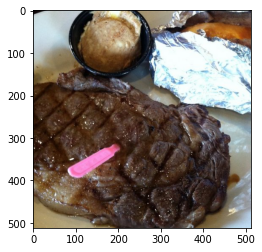

In [16]:
img = view_random_image('pizza_steak/train/', 'steak')

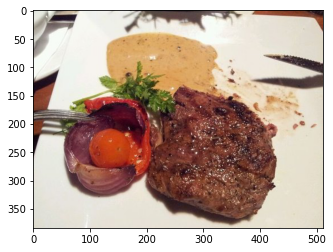

In [17]:
_ = view_random_image('pizza_steak/train/', 'steak')

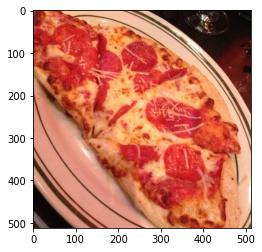

In [18]:
_ = view_random_image('pizza_steak/train/', 'pizza')

In [19]:
import tensorflow as tf

In [20]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 11,   5,   9],
        [ 13,   7,   9],
        [ 14,   8,  10],
        ...,
        [ 83,  86,  95],
        [ 54,  54,  64],
        [ 51,  51,  61]],

       [[ 12,   6,   8],
        [ 12,   6,   8],
        [ 14,   8,  10],
        ...,
        [ 45,  45,  55],
        [ 49,  49,  61],
        [ 51,  51,  63]],

       [[ 16,  10,  12],
        [ 15,   9,  11],
        [ 14,   8,  10],
        ...,
        [ 58,  58,  70],
        [ 53,  52,  66],
        [ 41,  40,  54]],

       ...,

       [[165, 143,  86],
        [164, 141,  87],
        [165, 142,  88],
        ...,
        [192, 223, 243],
        [194, 225, 245],
        [196, 227, 247]],

       [[165, 143,  86],
        [165, 142,  88],
        [166, 143,  89],
        ...,
        [193, 224, 244],
        [195, 226, 246],
        [197, 228, 248]],

       [[166, 144,  87],
        [165, 142,  88],
        [167, 144,  90],
        ...,
        [194, 225, 24

In [21]:
img.shape

(512, 512, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
valid_datagen = ImageDataGenerator(rescale = 1/255.)

In [24]:
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

In [25]:
train_data = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size = (224, 224), class_mode = 'binary')

Found 1500 images belonging to 2 classes.


In [26]:
valid_data = valid_datagen.flow_from_directory(test_dir, batch_size = 32, target_size = (224, 224), class_mode = 'binary')

Found 500 images belonging to 2 classes.


In [27]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224,224,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'valid'))
model.add(tf.keras.layers.Conv2D(10, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [28]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [29]:
model.fit(train_data, epochs = 5, steps_per_epoch = len(train_data))

Epoch 1/5
47/47 [==============================] - 20s 143ms/step - loss: 0.5984 - accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4055 - accuracy: 0.8173
Epoch 3/5
47/47 [==============================] - 7s 140ms/step - loss: 0.3641 - accuracy: 0.8433
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3078 - accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.2654 - accuracy: 0.9007


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [ ]:
model_2 = Sequential()

model_2.add(Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu', input_shape = (224, 224, 3)))
model_2.add(Conv2D(10, 3, activation = 'relu'))
model_2.add(Conv2D(10, 3, activation = 'relu'))
model_2.add(Flatten())
model_2.add(Dense(1, activation = 'sigmoid'))

model_2.compile(loss = 'binary_crossentropy', optimizer = Adam(), metrics = 'accuracy')

In [ ]:
history = model_2.fit(
    train_data,
    epochs = 5,
    validation_data = valid_data
)

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 5))

In [34]:
model_3 = Sequential()

model_3.add(Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu', input_shape = (224, 224, 3)))
model_3.add(MaxPool2D((2,2)))
model_3.add(Conv2D(20, 3, activation = 'relu'))
model_3.add(MaxPool2D((2,2)))
model_3.add(Conv2D(20, 3, activation = 'relu'))
model_3.add(MaxPool2D((2,2)))
model_3.add(Flatten())
model_3.add(Dense(1, activation = 'sigmoid'))

model_3.compile(loss = 'binary_crossentropy', optimizer = Adam(), metrics = 'accuracy')

In [ ]:
history = model_3.fit(
    train_data,
    epochs = 5,
    validation_data = valid_data
)

In [ ]:
model_3.summary()

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 5))

In [38]:
train_datagen_augment = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

In [ ]:
train_data_augment = train_datagen_augment.flow_from_directory(train_dir, batch_size = 32, target_size = (224, 224), class_mode = 'binary')

In [ ]:
model_4 = Sequential()

model_4.add(Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu', input_shape = (224, 224, 3)))
model_4.add(MaxPool2D((2,2)))
model_4.add(Conv2D(20, 3, activation = 'relu'))
model_4.add(MaxPool2D((2,2)))
model_4.add(Conv2D(20, 3, activation = 'relu'))
model_4.add(MaxPool2D((2,2)))
model_4.add(Flatten())
model_4.add(Dense(1, activation = 'sigmoid'))

model_4.compile(loss = 'binary_crossentropy', optimizer = Adam(), metrics = 'accuracy')

In [ ]:
history = model_4.fit(
    train_data_augment,
    epochs = 5,
    validation_data = valid_data
)

In [42]:
model_5 = Sequential()

model_5.add(Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu', input_shape = (224, 224, 3)))
model_5.add(MaxPool2D((2,2)))
model_5.add(Conv2D(32, 3, activation = 'relu'))
model_5.add(MaxPool2D((2,2)))
model_5.add(Conv2D(32, 3, activation = 'relu'))
model_5.add(MaxPool2D((2,2)))
model_5.add(Conv2D(32, 3, activation = 'relu'))
model_5.add(MaxPool2D((2,2)))
model_5.add(Flatten())
model_5.add(Dense(1, activation = 'sigmoid'))

model_5.compile(loss = 'binary_crossentropy', optimizer = Adam(), metrics = 'accuracy')

In [ ]:
history = model_5.fit(
    train_data_augment,
    epochs = 5,
    validation_data = valid_data
)

In [ ]:
model_5.summary()

In [ ]:
def load_and_prep_image(file_name, img_shape):
  """Loads in image from filaname and processes into tensor"""
  image = tf.io.read_file(file_name)
  img = tf.image.decode_image(image) # decode into tensor
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  
  return img

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

In [ ]:
steak = load_and_prep_image('03-steak.jpeg', 224)

In [49]:
pred = model_5.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.87359065]], dtype=float32)

In [ ]:
class_names

In [ ]:
pred_class = class_names[int(tf.round(pred))]

In [52]:
pred_class

'steak'

In [53]:
def pred_and_plot(model, filename, class_names = class_names):
  """Imports image and makes prediction"""
  img = load_and_prep_image(filename, 224)
  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

  return pred_class

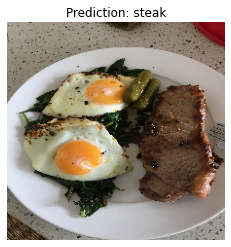

In [54]:
pred_class = pred_and_plot(model_5, '03-steak.jpeg')

In [55]:
pred_class

'steak'

--2022-06-06 13:09:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-06-06 13:09:30 (243 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



'pizza'

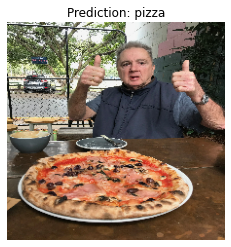

In [56]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_4, "03-pizza-dad.jpeg")

## Multiclass

In [57]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-06-06 13:09:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.188.208, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   207MB/s    in 2.4s    

2022-06-06 13:09:33 (207 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [58]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [59]:
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

There are 2 directories and 0 files in 10_food_classes_all_data
There are 10 directories and 0 files in 10_food_classes_all_data/train
There are 0 directories and 750 files in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 files in 10_food_classes_all_data/train/steak
There are 0 directories and 750 files in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 files in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 files in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 files in 10_food_classes_all_data/train/hamburger
There are 0 directories and 750 files in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 files in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 files in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 files in 10_food_classes_all_data/train/grilled_salmon
There are 10 directories and 0 files in 10_food

In [60]:
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [61]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
valid_datagen = ImageDataGenerator(rescale = 1/255.)

In [62]:
train_data = train_datagen.flow_from_directory(train_dir, batch_size = 32, target_size = (224, 224), class_mode = 'categorical')
valid_data = valid_datagen.flow_from_directory(test_dir, batch_size = 32, target_size = (224,224), class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Create Model

In [63]:
model_6 = Sequential()

model_6.add(Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu', input_shape = (224, 224, 3)))
model_6.add(MaxPool2D((2,2)))
model_6.add(Conv2D(32, 3, activation = 'relu'))
model_6.add(MaxPool2D((2,2)))
model_6.add(Conv2D(32, 3, activation = 'relu'))
model_6.add(MaxPool2D((2,2)))
model_6.add(Conv2D(32, 3, activation = 'relu'))
model_6.add(MaxPool2D((2,2)))
model_6.add(Flatten())
model_6.add(Dense(10, activation = 'softmax'))

model_6.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = 'accuracy')

In [ ]:
history = model_6.fit(
    train_data,
    epochs = 5,
    validation_data = valid_data
)

Evaluate

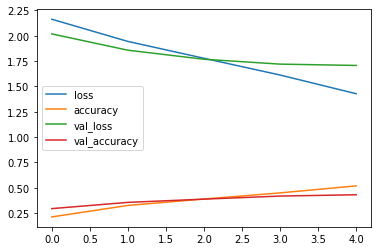

In [65]:
pd.DataFrame(history.history).plot()

Improve accuracy by augmenting data

In [72]:
model_7 = tf.keras.models.clone_model(model_6)

In [73]:
model_7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 32)      2912      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 32)      

In [74]:
train_data_augment = train_datagen_augment.flow_from_directory(train_dir, batch_size = 32, target_size = (224, 224), class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [75]:
model_7.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = 'accuracy')

In [76]:
history = model_7.fit(
    train_data_augment,
    epochs = 10,
    validation_data = valid_data
)

Epoch 1/10
235/235 [==============================] - 110s 465ms/step - loss: 2.2401 - accuracy: 0.1603 - val_loss: 2.0827 - val_accuracy: 0.2396
Epoch 2/10
235/235 [==============================] - 108s 458ms/step - loss: 2.0835 - accuracy: 0.2541 - val_loss: 1.9281 - val_accuracy: 0.3072
Epoch 3/10
235/235 [==============================] - 108s 461ms/step - loss: 1.9770 - accuracy: 0.3091 - val_loss: 1.8031 - val_accuracy: 0.3860
Epoch 4/10
235/235 [==============================] - 108s 458ms/step - loss: 1.9115 - accuracy: 0.3323 - val_loss: 1.8341 - val_accuracy: 0.3584
Epoch 5/10
235/235 [==============================] - 108s 459ms/step - loss: 1.8785 - accuracy: 0.3555 - val_loss: 1.7198 - val_accuracy: 0.4188
Epoch 6/10
235/235 [==============================] - 108s 460ms/step - loss: 1.8249 - accuracy: 0.3797 - val_loss: 1.6660 - val_accuracy: 0.4320
Epoch 7/10
235/235 [==============================] - 108s 457ms/step - loss: 1.7766 - accuracy: 0.3916 - val_loss: 1.6739 -

In [81]:
data_dir = pathlib.Path('10_food_classes_all_data/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [82]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')